In [8]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import io

In [2]:
# Task 1: Extract the dataset using panda / read the dataset
from google.colab import files
uploaded = files.upload()

Saving College_K_Means.csv to College_K_Means.csv


In [9]:
df = pd.read_csv('College_K_Means.csv')

In [20]:
#Label Encoding
label_encoder = preprocessing.LabelEncoder()
df['private']= label_encoder.fit_transform(df['private'])
df['private'].unique()

array([1, 0])

In [14]:
# Data Pre-processing
# Check for missing values
print(df.isnull().sum())

private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64


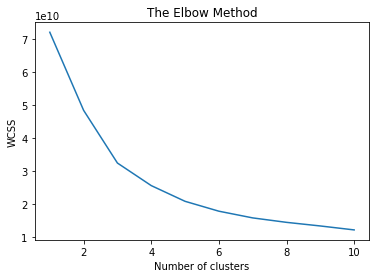

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# 3. Training the K-means algorithm on the training dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(df)

In [21]:
# 4. Visualizing the clusters
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of colleges')
plt.xlabel('Private')
plt.ylabel('Apps')
plt.legend()
plt.show()

TypeError: ignored